In [6]:
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, f1_score,confusion_matrix
from sklearn.datasets import load_breast_cancer

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

Train F1 Score: 0.9982486865148862
Test F1 Score: 0.9726027397260274
====================CONFUSION MATRIX=========================


Text(0.5, 1.0, 'TEST CONFUSION MATRIX')

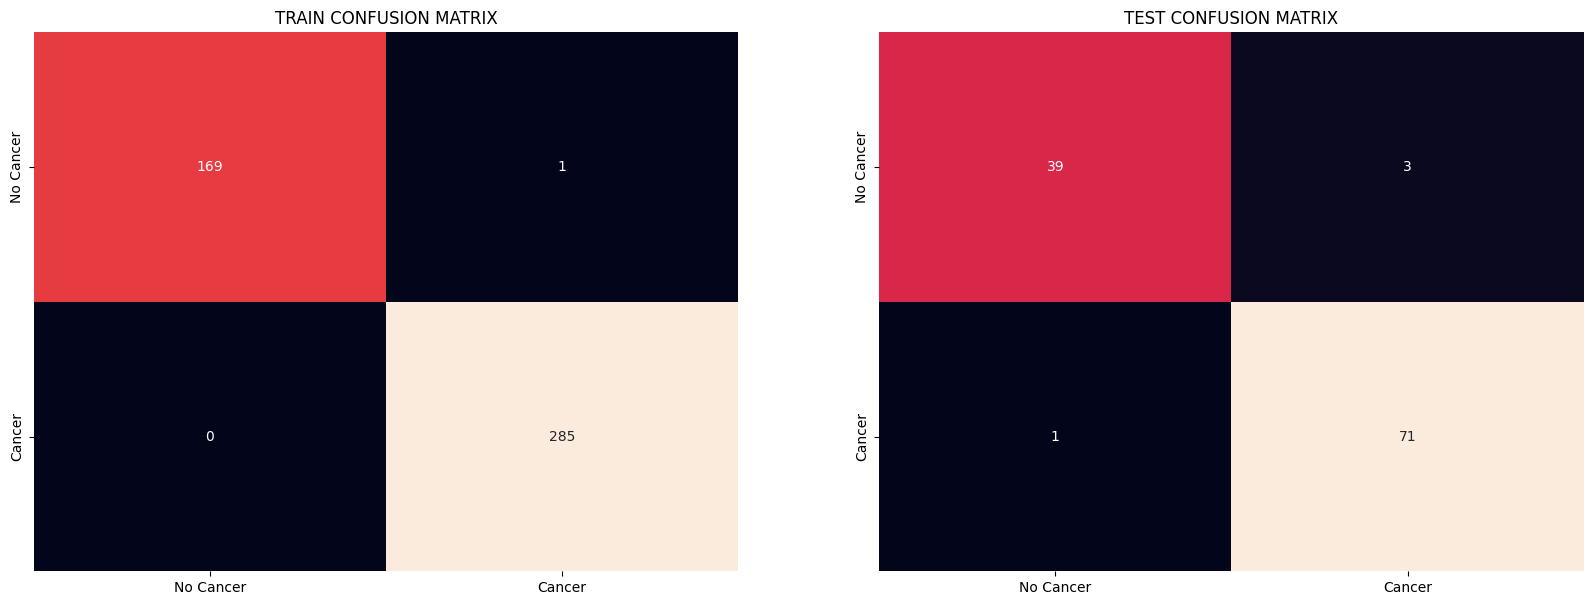

In [19]:
X = load_breast_cancer(as_frame=True)['data']
y = load_breast_cancer()['target']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=23, stratify=y)

# train the model
model = XGBClassifier(n_estimators = 5,
                      random_state = 23)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# evaluate model performance
train_score = f1_score(y_train, train_preds)
test_score = f1_score(y_test, test_preds)

print(f'Train F1 Score: {train_score}')
print(f'Test F1 Score: {test_score}')

print('====================CONFUSION MATRIX=========================')
conf_train = confusion_matrix(y_train, train_preds)
conf_test = confusion_matrix(y_test, test_preds)
columns = ['No Cancer', 'Cancer']
conf_train = pd.DataFrame(data=conf_train, index=columns, columns=columns)
conf_test = pd.DataFrame(data=conf_test, index=columns, columns=columns)

fig, axes = plt.subplots(nrows=1, ncols= 2, figsize = (20, 7))
sns.heatmap(data = conf_train, annot=True, cbar=False, ax = axes[0], fmt = 'd')
sns.heatmap(data = conf_test, annot=True, cbar=False, ax = axes[1])

axes[0].set_title('TRAIN CONFUSION MATRIX')
axes[1].set_title('TEST CONFUSION MATRIX')

In [17]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 5,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 23,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Assignment
Train the folllowing models

1. Xgboost regression model on insurance data
2. Decision tree classifier on loan dataset

### GRADIENT BOOSTING (OCT COHORT)

In [ ]:
# !pip install xgboost (if xgboost is not already installed)

In [5]:
import pandas as pd
import numpy as np


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')
sns.set_style('darkgrid')

In [6]:
# load the dataset

X = load_breast_cancer(as_frame=True)['data']
y = load_breast_cancer()['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=23, stratify=y)


# scale the dataset
def scale_data(data: pd.DataFrame) -> pd.DataFrame:
    
    scaler = StandardScaler()
    columns = list(data.columns)
    scaler.fit(data)
    data = pd.DataFrame(data=scaler.transform(data), columns = columns)
    
    return data

# scale the data
X_train = scale_data(data=X_train)
X_test = scale_data(data = X_test)

# train the model
model = XGBClassifier(random_state = 23)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [8]:
# evaluate the model
print('======Train Classification=======')
print(f'{classification_report(y_train, train_preds)}')
print('======Test Classification=======')
print(f'{classification_report(y_test, test_preds)}')

======Train Classification=======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       285

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

======Test Classification=======
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

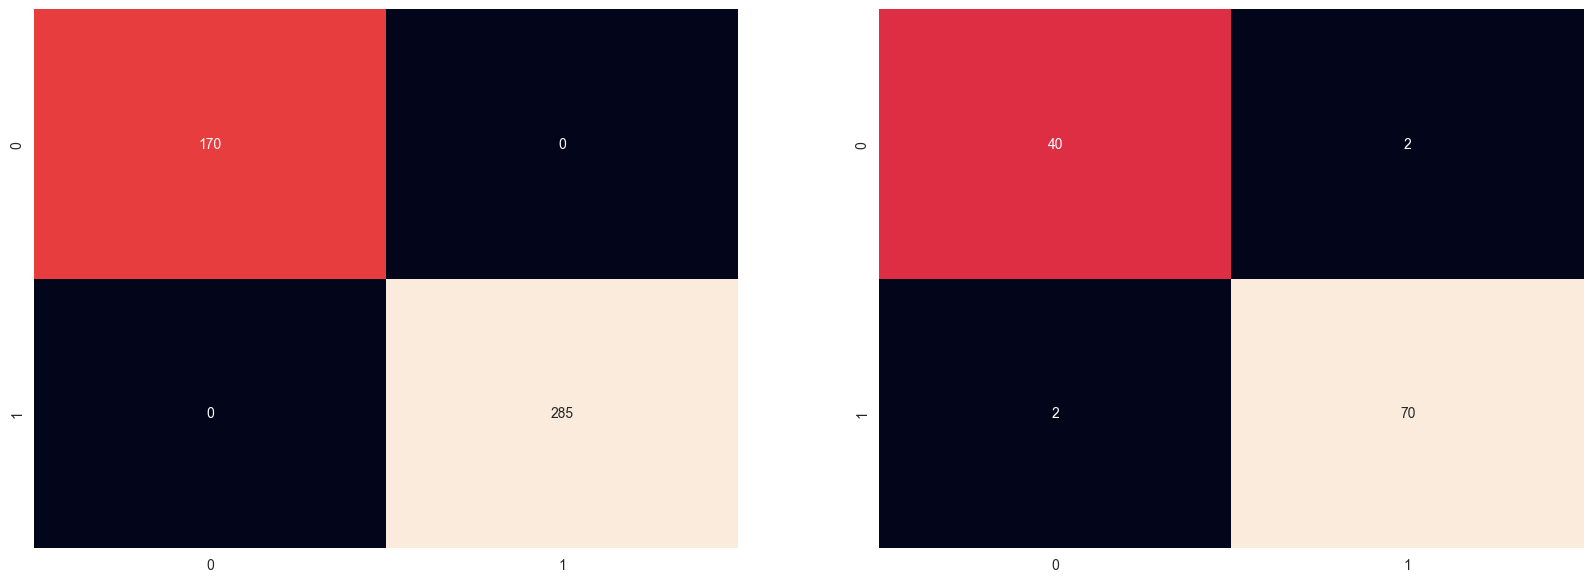

In [10]:
fig, axes = plt.subplots(1,2, figsize = (20,7))
col_names = ['No Cancer', 'Has Cancer']
conf_test = confusion_matrix(y_test, test_preds)
conf_train = confusion_matrix(y_train, train_preds)
sns.heatmap(data=conf_train, annot=True, fmt = 'd', cbar=False, ax=axes[0])
sns.heatmap(data=conf_test, annot =True, fmt ='d', cbar=False, ax=axes[1])

### REGRESSION OCT COHORT)

In [11]:
import pandas as pd
import numpy as np


from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')
sns.set_style('darkgrid')

In [12]:
# load the dataset

X = load_diabetes(as_frame=True)['data']
y = load_diabetes()['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=23)



# train the model
reg_model = XGBRegressor(random_state = 23)
reg_model.fit(X_train, y_train)
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

In [13]:
print(f'rmse_train: {root_mean_squared_error(y_true = y_train, y_pred=train_preds)}')
print(f'rmse_test: {root_mean_squared_error(y_test, test_preds)}')

rmse_train: 0.11891673636703831
rmse_test: 65.30863835344606
